# Problem Statement

Customer Segmentation Analysis:

Customer segmentation is the problem of uncovering information about a firm's customer base, based on their interactions with the bsusiness. In most cases their interaction is in terms of their purchase behaviour and patterns. We explore some of the ways in which this can be used.

You own the mall and want to understand the customers like who can easily converge[Target Customers] so that the sense can be given to marketing team and plan the stategy accordingly.


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [10]:
data = pd.read_csv("Mall_Customers.csv")
data.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [11]:
data.shape

(200, 5)

In [12]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [14]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [21]:
import missingno as msno

<Axes: >

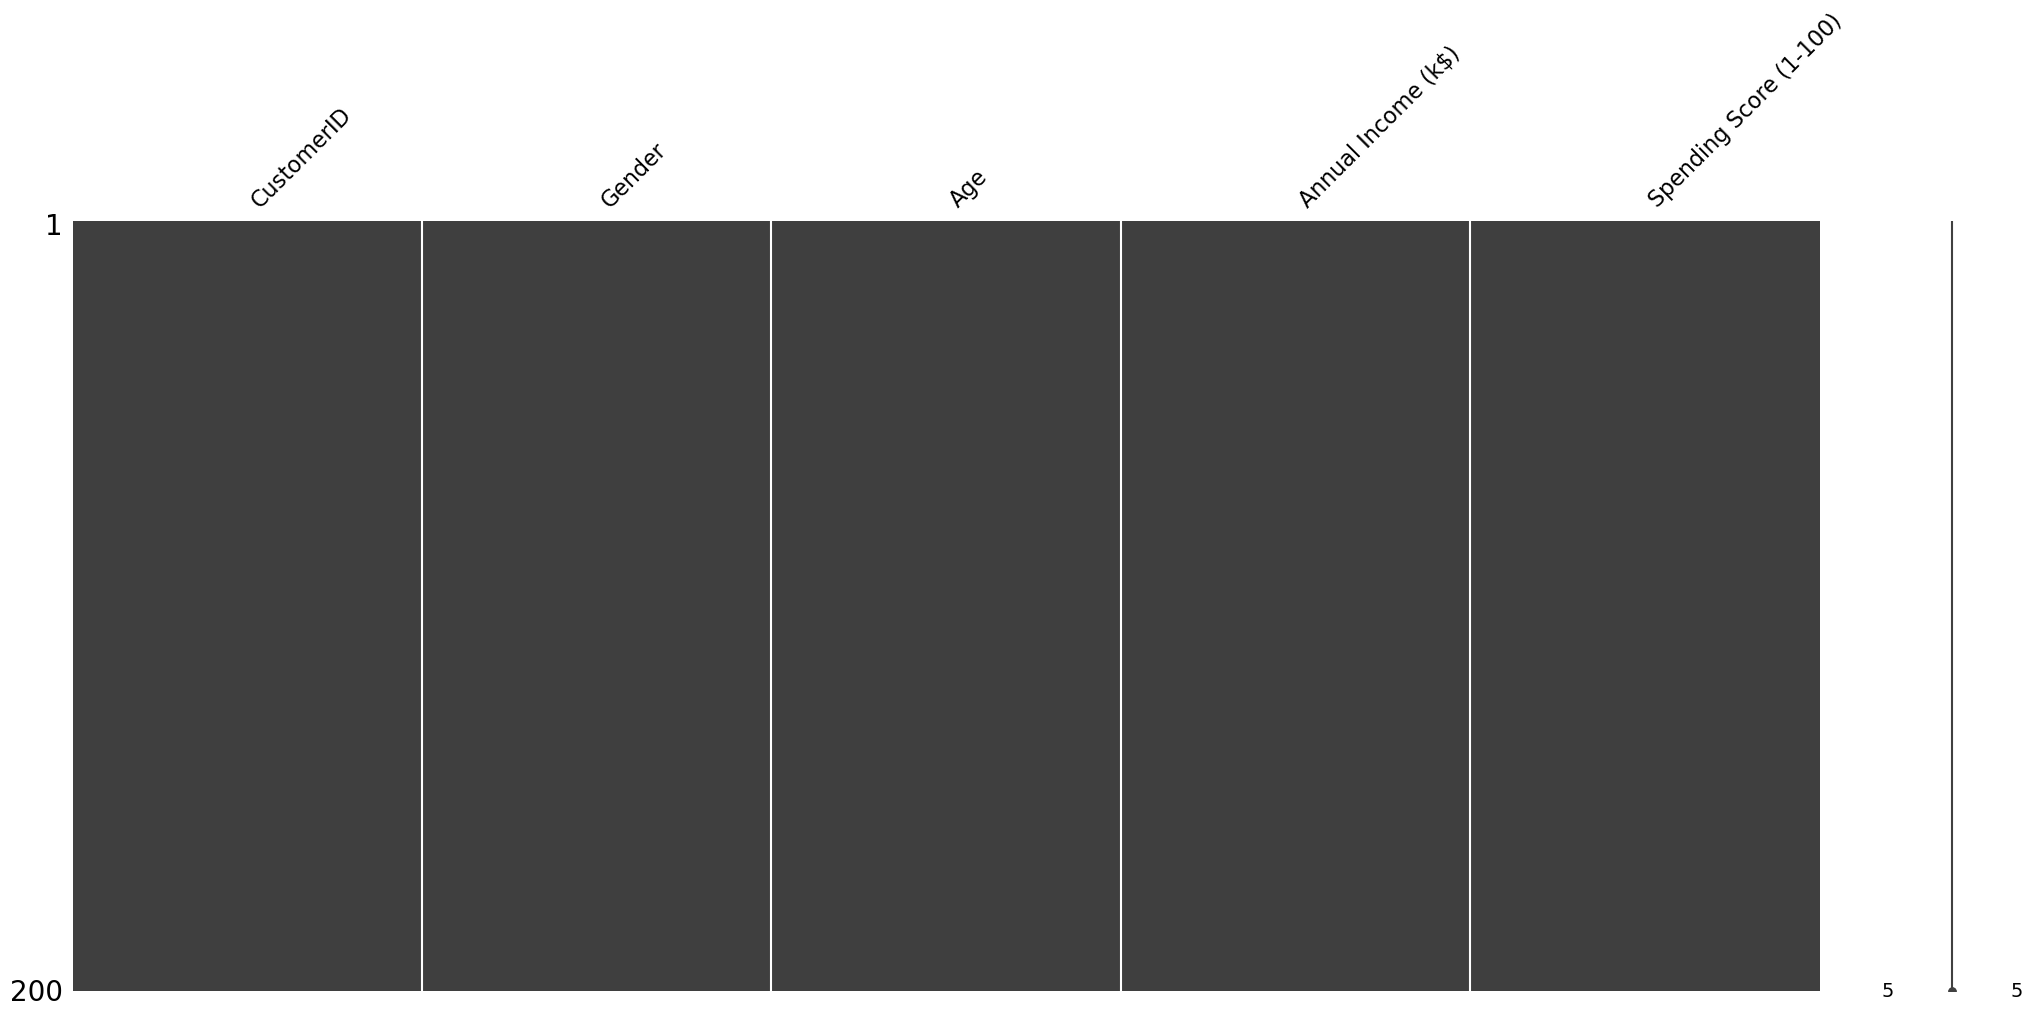

In [22]:
msno.matrix(data)

# Data Visualization & EDA

In [23]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

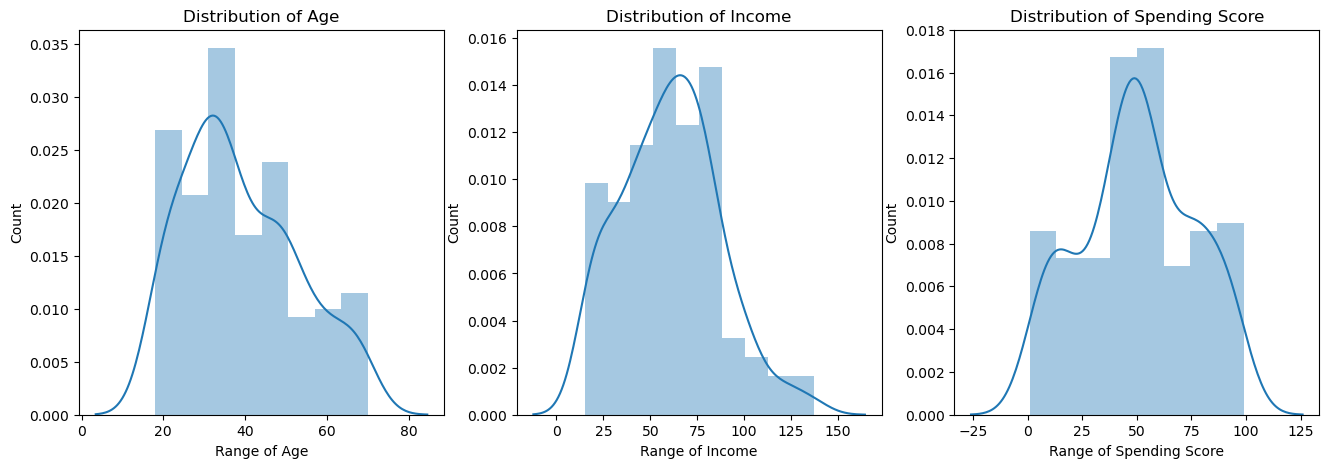

In [30]:
plt.figure(figsize = (16,5))

plt.subplot(1, 3, 1)
sns.distplot(data['Age'])
plt.title("Distribution of Age")
plt.xlabel("Range of Age")
plt.ylabel("Count")

plt.subplot(1, 3, 2)
sns.distplot(data['Annual Income (k$)'])
plt.title("Distribution of Income")
plt.xlabel("Range of Income")
plt.ylabel("Count")

plt.subplot(1, 3, 3)
sns.distplot(data['Spending Score (1-100)'])
plt.title("Distribution of Spending Score")
plt.xlabel("Range of Spending Score")
plt.ylabel("Count")
plt.show()

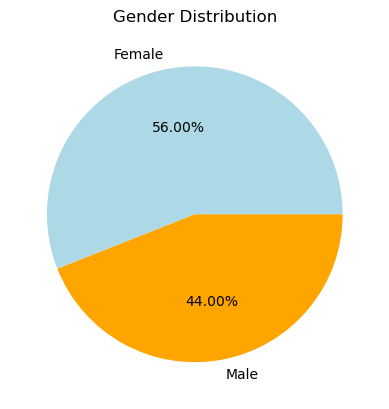

In [39]:
df = data.groupby('Gender').size()

df.plot(kind = 'pie', subplots = True,
       colors = ['lightblue', 'orange'],
       explode = [0, 0.001],
       labels = ['Female', 'Male'],
       autopct = '%.2f%%')
plt.title("Gender Distribution")
plt.ylabel("")
plt.show()

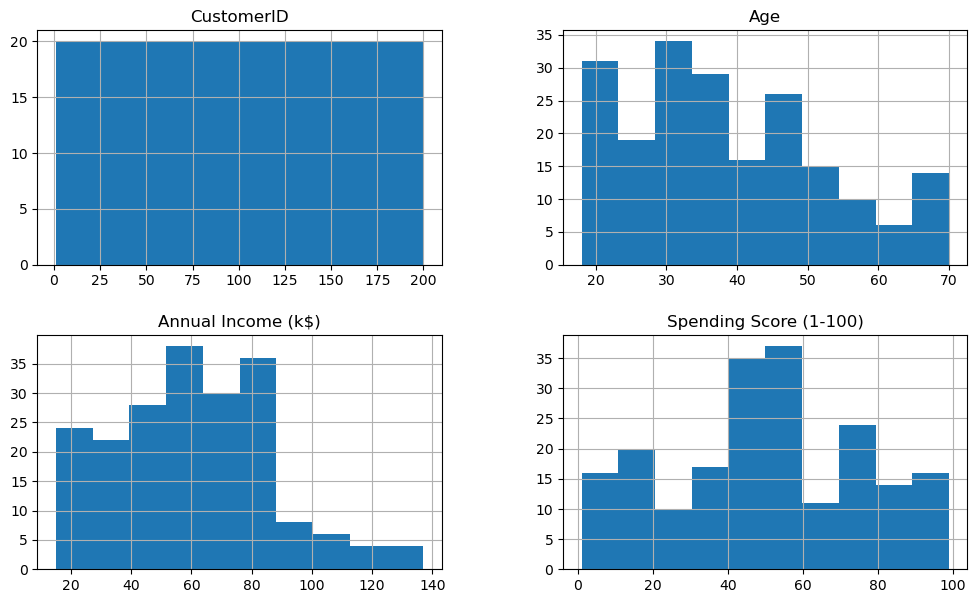

In [40]:
data.hist(figsize = (12, 7))
plt.show()

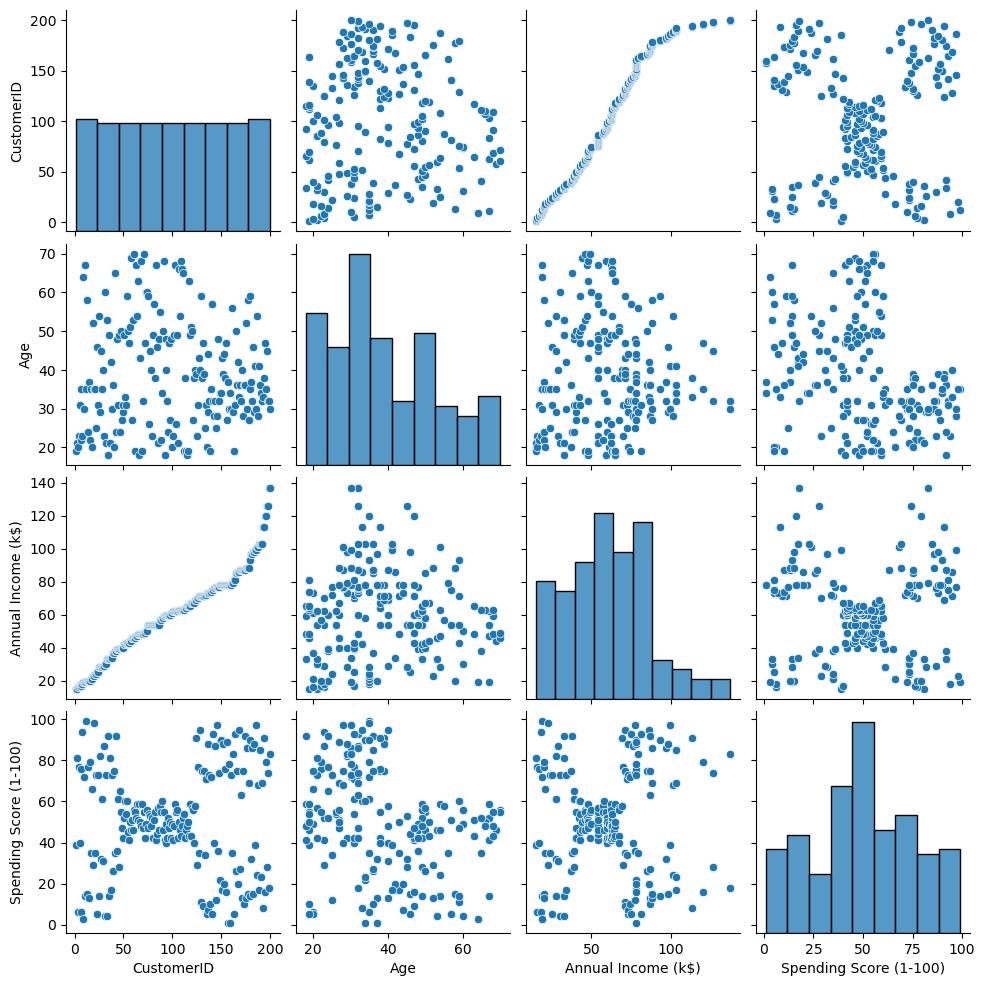

In [41]:
sns.pairplot(data)
plt.show()

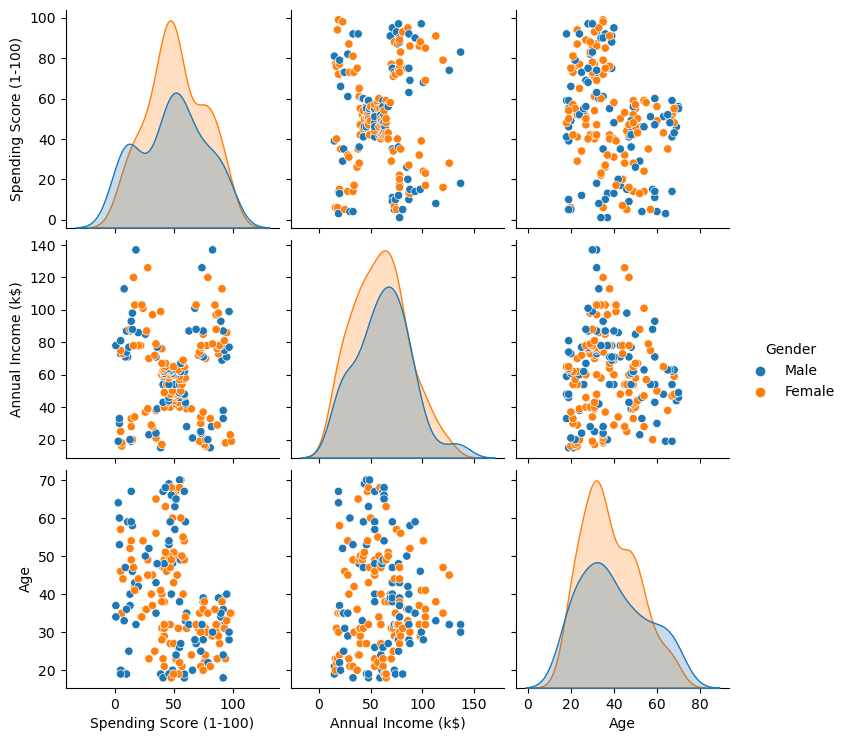

In [42]:
sns.pairplot(data, vars = ['Spending Score (1-100)',
                          'Annual Income (k$)', 'Age'], hue = 'Gender')

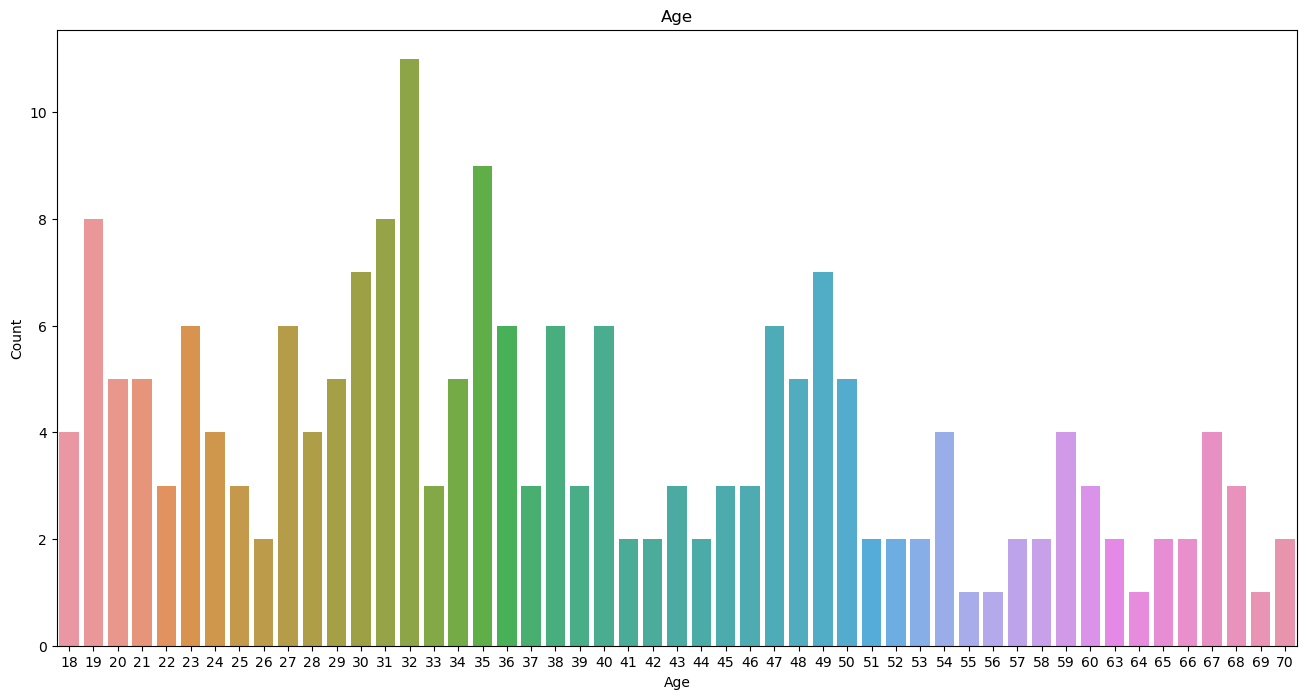

In [57]:
age_counts = data['Age'].value_counts().reset_index()
age_counts.columns = ['Age', 'Count']
plt.figure(figsize=(16, 8))
sns.barplot(data=age_counts, x='Age', y='Count')
plt.title("Age")
plt.show()

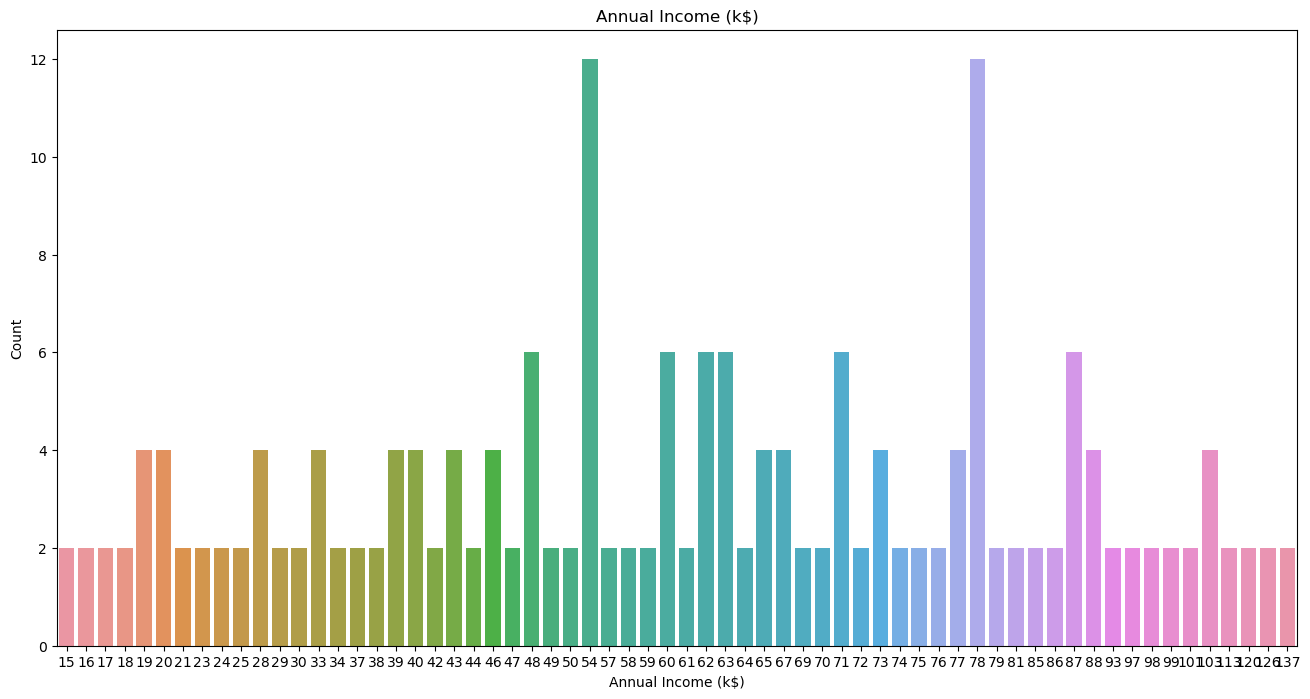

In [59]:
annual_income_counts = data['Annual Income (k$)'].value_counts().reset_index()
annual_income_counts.columns = ['Annual Income (k$)', 'Count']
plt.figure(figsize=(16, 8))
sns.barplot(data=annual_income_counts, x='Annual Income (k$)', y='Count')
plt.title("Annual Income (k$)")
plt.show()

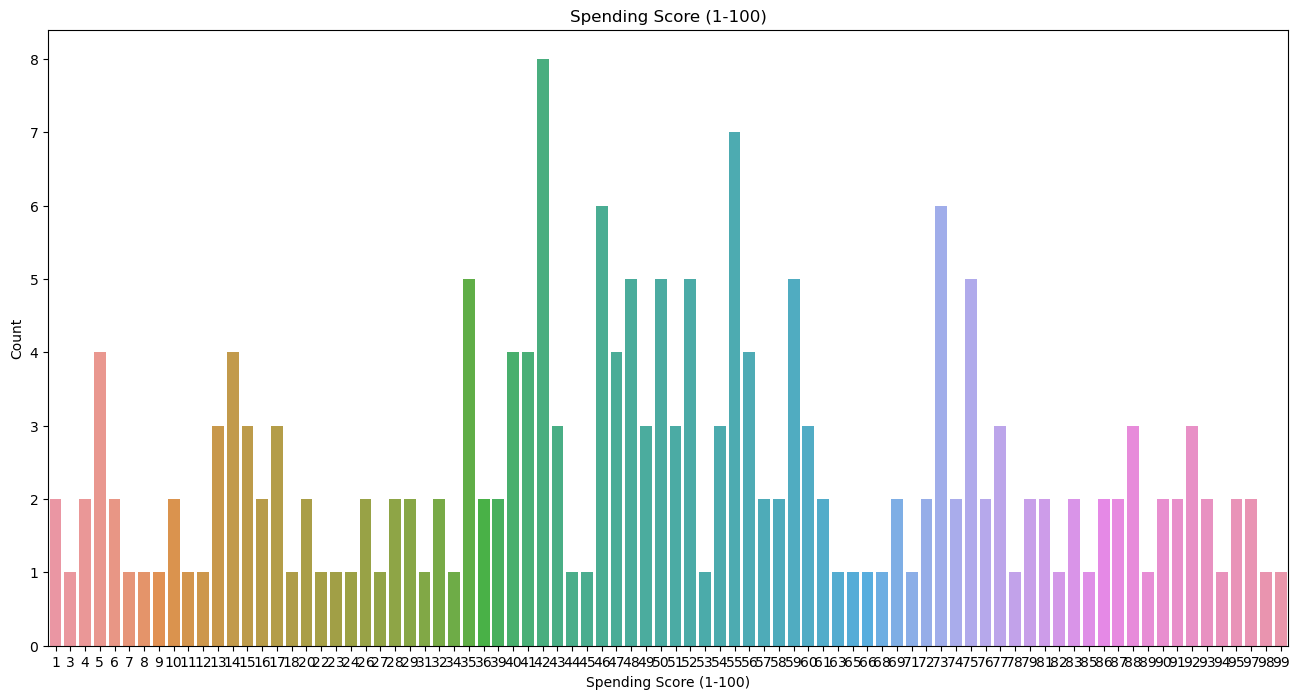

In [61]:
spending_score_counts = data['Spending Score (1-100)'].value_counts().reset_index()
spending_score_counts.columns = ['Spending Score (1-100)', 'Count']
plt.figure(figsize=(16, 8))
sns.barplot(data=spending_score_counts, x='Spending Score (1-100)', y='Count')
plt.title("Spending Score (1-100)")
plt.show()

In [63]:
!pip install dabl

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for dabl from https://files.pythonhosted.org/packages/f8/fa/afb8a726f1e633f4c75598e3c2b3c33bd3d4c1c8d0032b8714b7186e6876/dabl-0.2.6.2-py3-none-any.whl.metadata
  Obtaining dependency information for matplotlib>=3.8 from https://files.pythonhosted.org/packages/2d/d5/6227732ecab9165586966ccb54301e3164f61b470c954c4cf6940654fbe1/matplotlib-3.8.4-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/567.0 kB ? eta -:--:--
   -------------------- ------------------- 297.0/567.0 kB 6.1 MB/s eta 0:00:01
   ---------------------------------------- 567.0/567.0 kB 8.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.7 MB ? eta -:--:--
   ----- ---------------------------------- 1.1/7.7 MB 24.5 MB/s eta 0:00:01
   ------------ --------------------------- 2.5/7.7 MB 31.6 MB/s eta 0:00:01
   -------------------- ------------------- 4.0/7.7 MB

In [64]:
import dabl

Target looks like regression


[<Axes: title={'center': 'Target distribution'}, xlabel='Spending Score (1...', ylabel='frequency'>,
 array([[<Axes: title={'center': 'F=-3.45E-01'}, xlabel='Age', ylabel='Spending Score (1...'>,
         <Axes: title={'center': 'F=7.84E-03'}, xlabel='Annual Income (k$)'>]],
       dtype=object),
 array([[<Axes: title={'center': 'F=6.09E-02'}, xlabel='Spending Score (1-100)', ylabel='Gender'>]],
       dtype=object)]

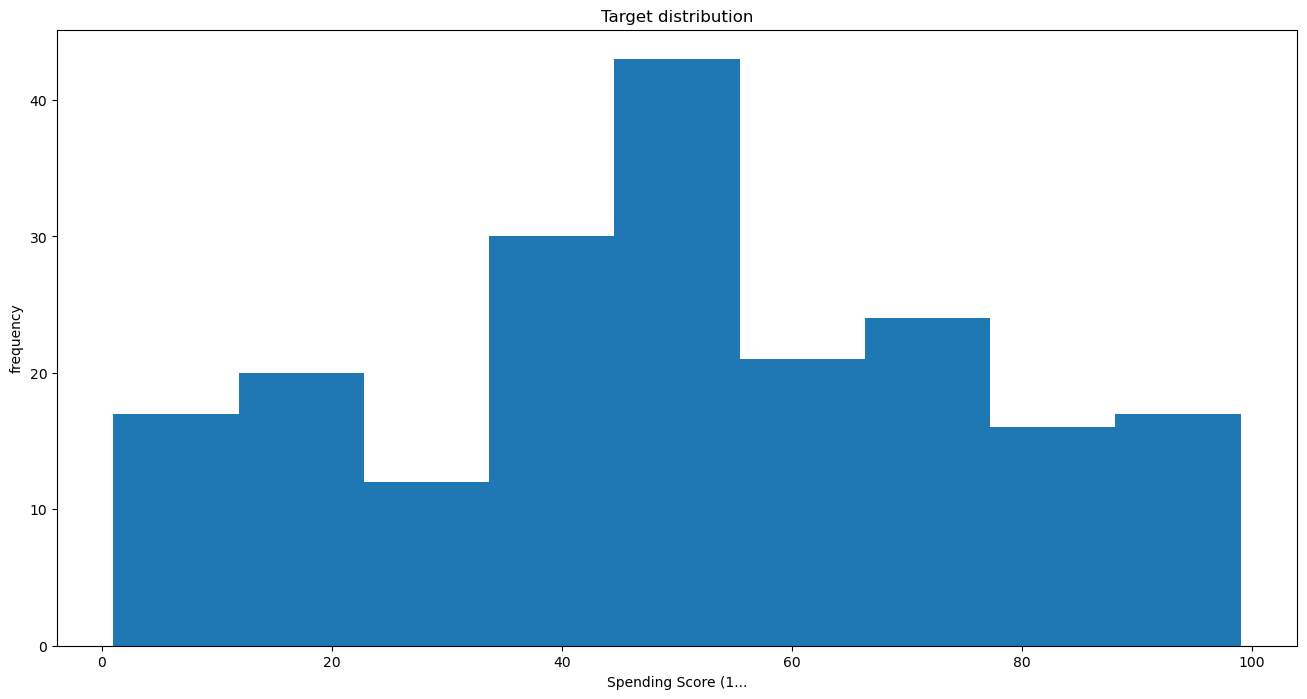

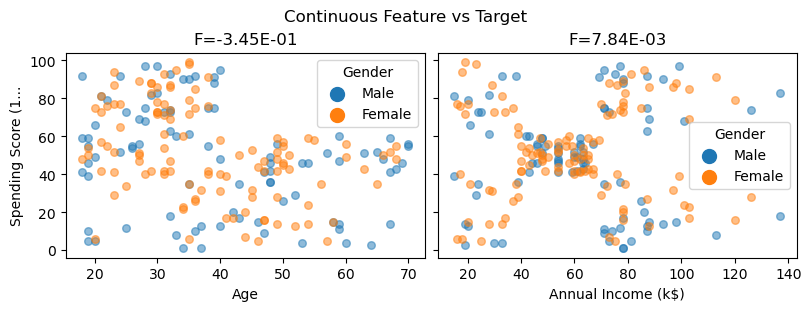

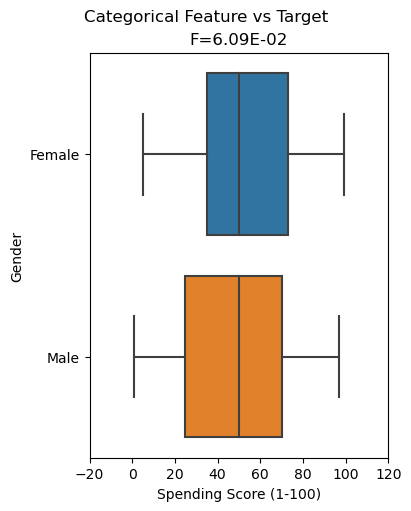

In [65]:
dabl.plot(data, target_col = 'Spending Score (1-100)' )

Target looks like regression


[<Axes: title={'center': 'Target distribution'}, xlabel='Annual Income (k$)', ylabel='frequency'>,
 array([[<Axes: title={'center': 'F=1.98E-02'}, xlabel='Age', ylabel='Annual Income (k$)'>,
         <Axes: title={'center': 'F=7.84E-03'}, xlabel='Spending Score (1-100)'>]],
       dtype=object),
 array([[<Axes: title={'center': 'F=0.00E+00'}, xlabel='Annual Income (k$)', ylabel='Gender'>]],
       dtype=object)]

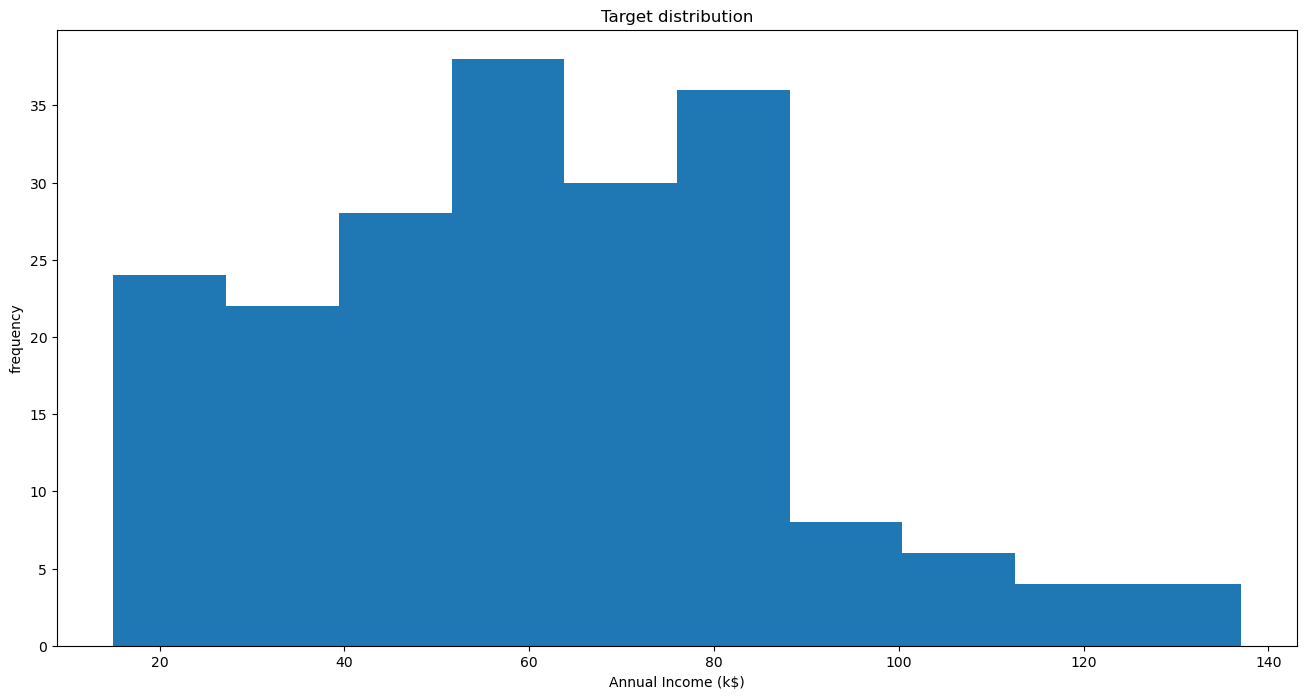

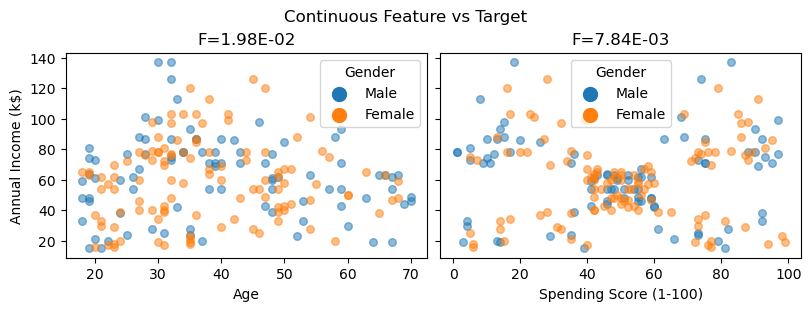

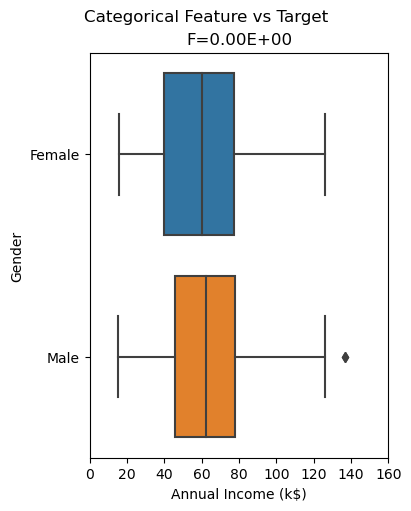

In [66]:
dabl.plot(data, target_col = 'Annual Income (k$)' )

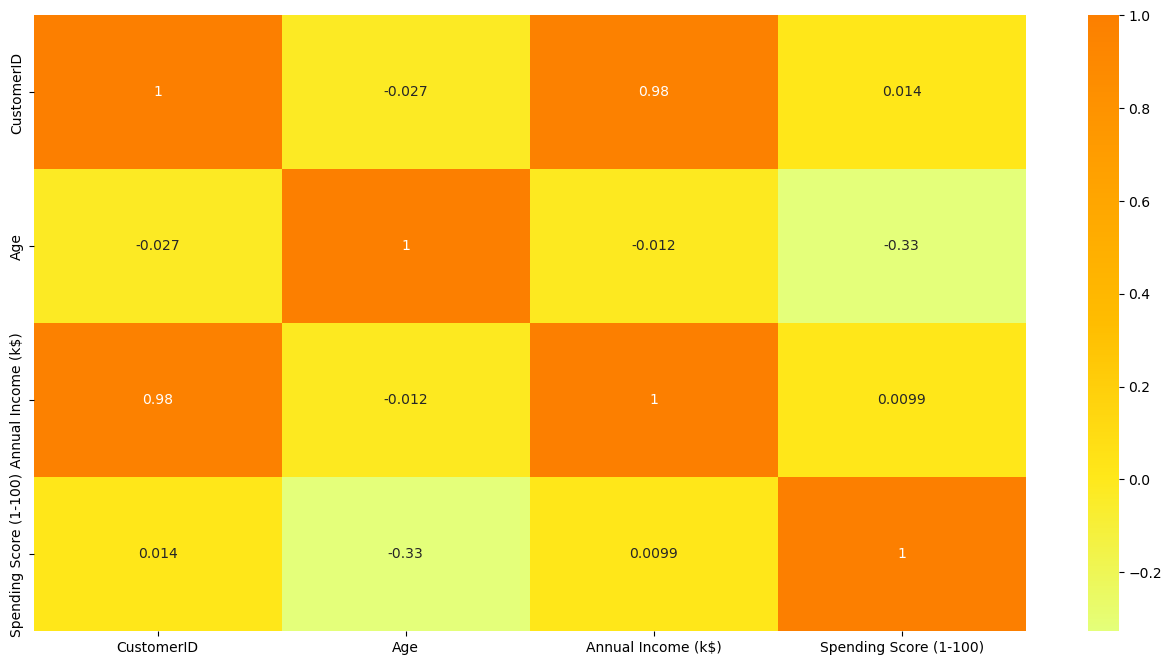

In [69]:
sns.heatmap(data.corr(), cmap = 'Wistia', annot = True)
plt.show()

In [70]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

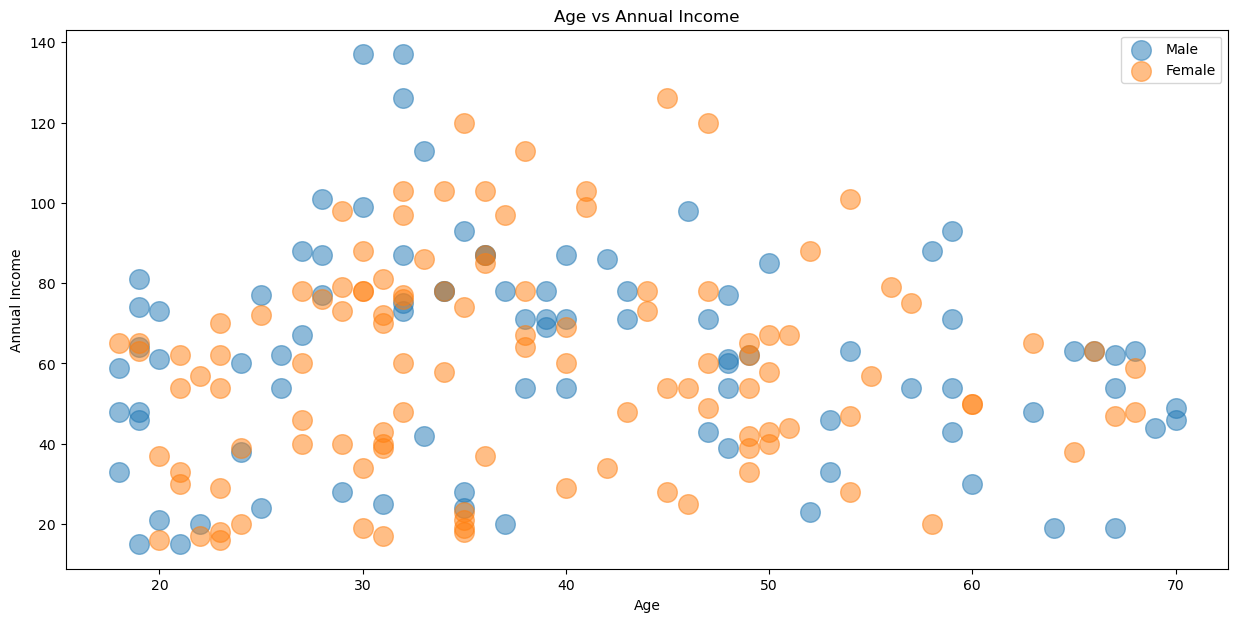

In [74]:
plt.figure(figsize = (15,7))
for gender in ['Male', 'Female']:
    plt.scatter(x = 'Age', y = 'Annual Income (k$)',
               data = data[data['Gender'] == gender],
               s = 200, alpha = 0.5,
               label = gender)
plt.xlabel("Age")
plt.ylabel("Annual Income")
plt.title("Age vs Annual Income")
plt.legend()
plt.show()

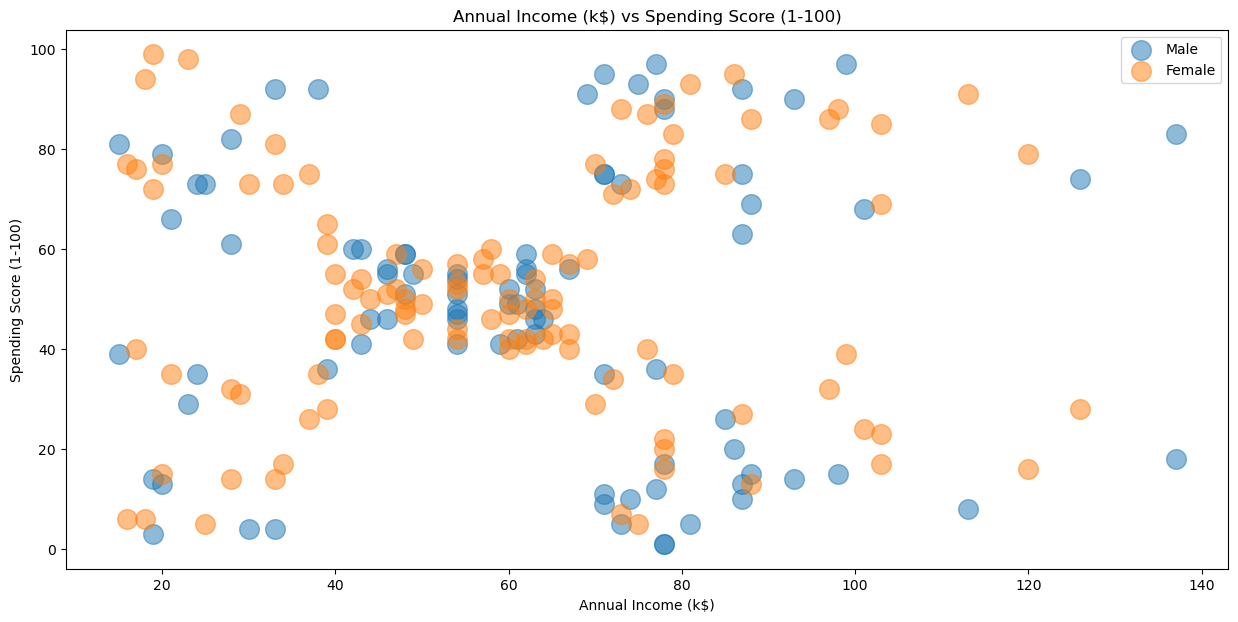

In [75]:
plt.figure(figsize = (15,7))
for gender in ['Male', 'Female']:
    plt.scatter(x = 'Annual Income (k$)', y = 'Spending Score (1-100)',
               data = data[data['Gender'] == gender],
               s = 200, alpha = 0.5,
               label = gender)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Annual Income (k$) vs Spending Score (1-100)")
plt.legend()
plt.show()

# K-Means Clustering 

In [76]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [95]:
X = data.iloc[:, [3,4]].values

In [96]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [89]:
from sklearn.cluster import KMeans

In [90]:
k = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(x)
    k.append(kmeans.inertia_)

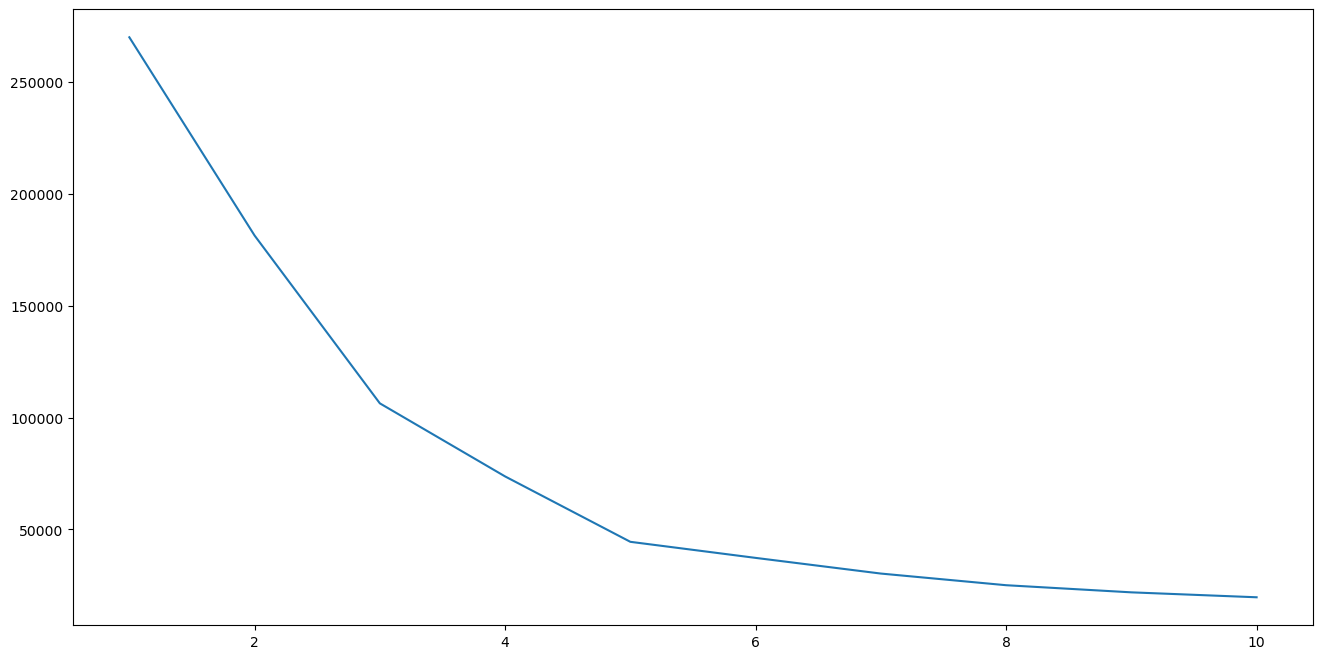

In [82]:
plt.plot(range(1,11), k)
plt.show()

In [98]:
model = KMeans(n_clusters = 5, init = 'k-means++', random_state = 0)
y_kemsn = model.fit_predict(X)

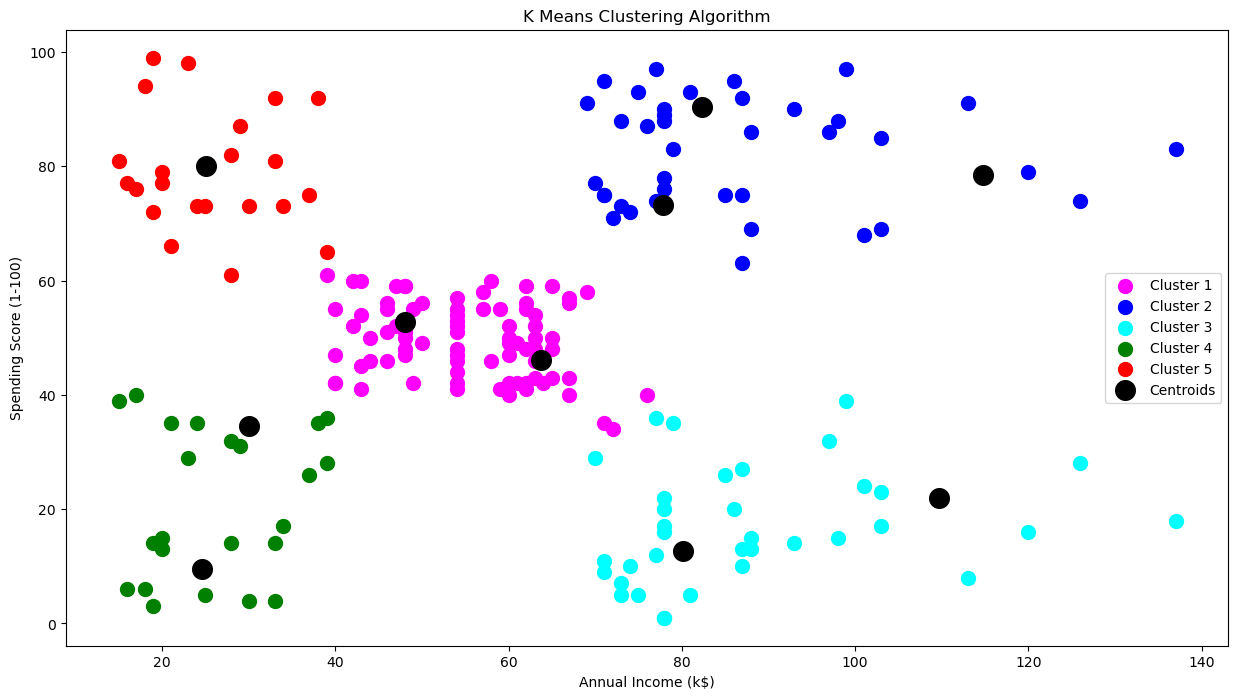

In [99]:
plt.figure(1 , figsize = (15 , 8))
plt.scatter(X[y_kemsn == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'magenta', label = 'Cluster 1') ### Cluster 1
plt.scatter(X[y_kemsn == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')  ## Cluster 2
plt.scatter(X[y_kemsn == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'cyan', label = 'Cluster 3')  ## Cluster 3
plt.scatter(X[y_kemsn == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'green', label = 'Cluster 4')  ## Cluster 4
plt.scatter(X[y_kemsn == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'red', label = 'Cluster 5')   ## Cluster 5
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'black', label = 'Centroids')
plt.title('K Means Clustering Algorithm')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()